# Mafengwo.com XHR

When a page adopts an infinite scroll design, asynchronous data loading is inevitable. When you encounter those cases, network trace analysis may give more concise solution. There are usually XHR interfaces. You don't even need dynamic crawling (browser simulation).

In [1]:
url = 'http://www.mafengwo.cn/u/69932798/review.html'

In [2]:
from IPython.core.display import Image

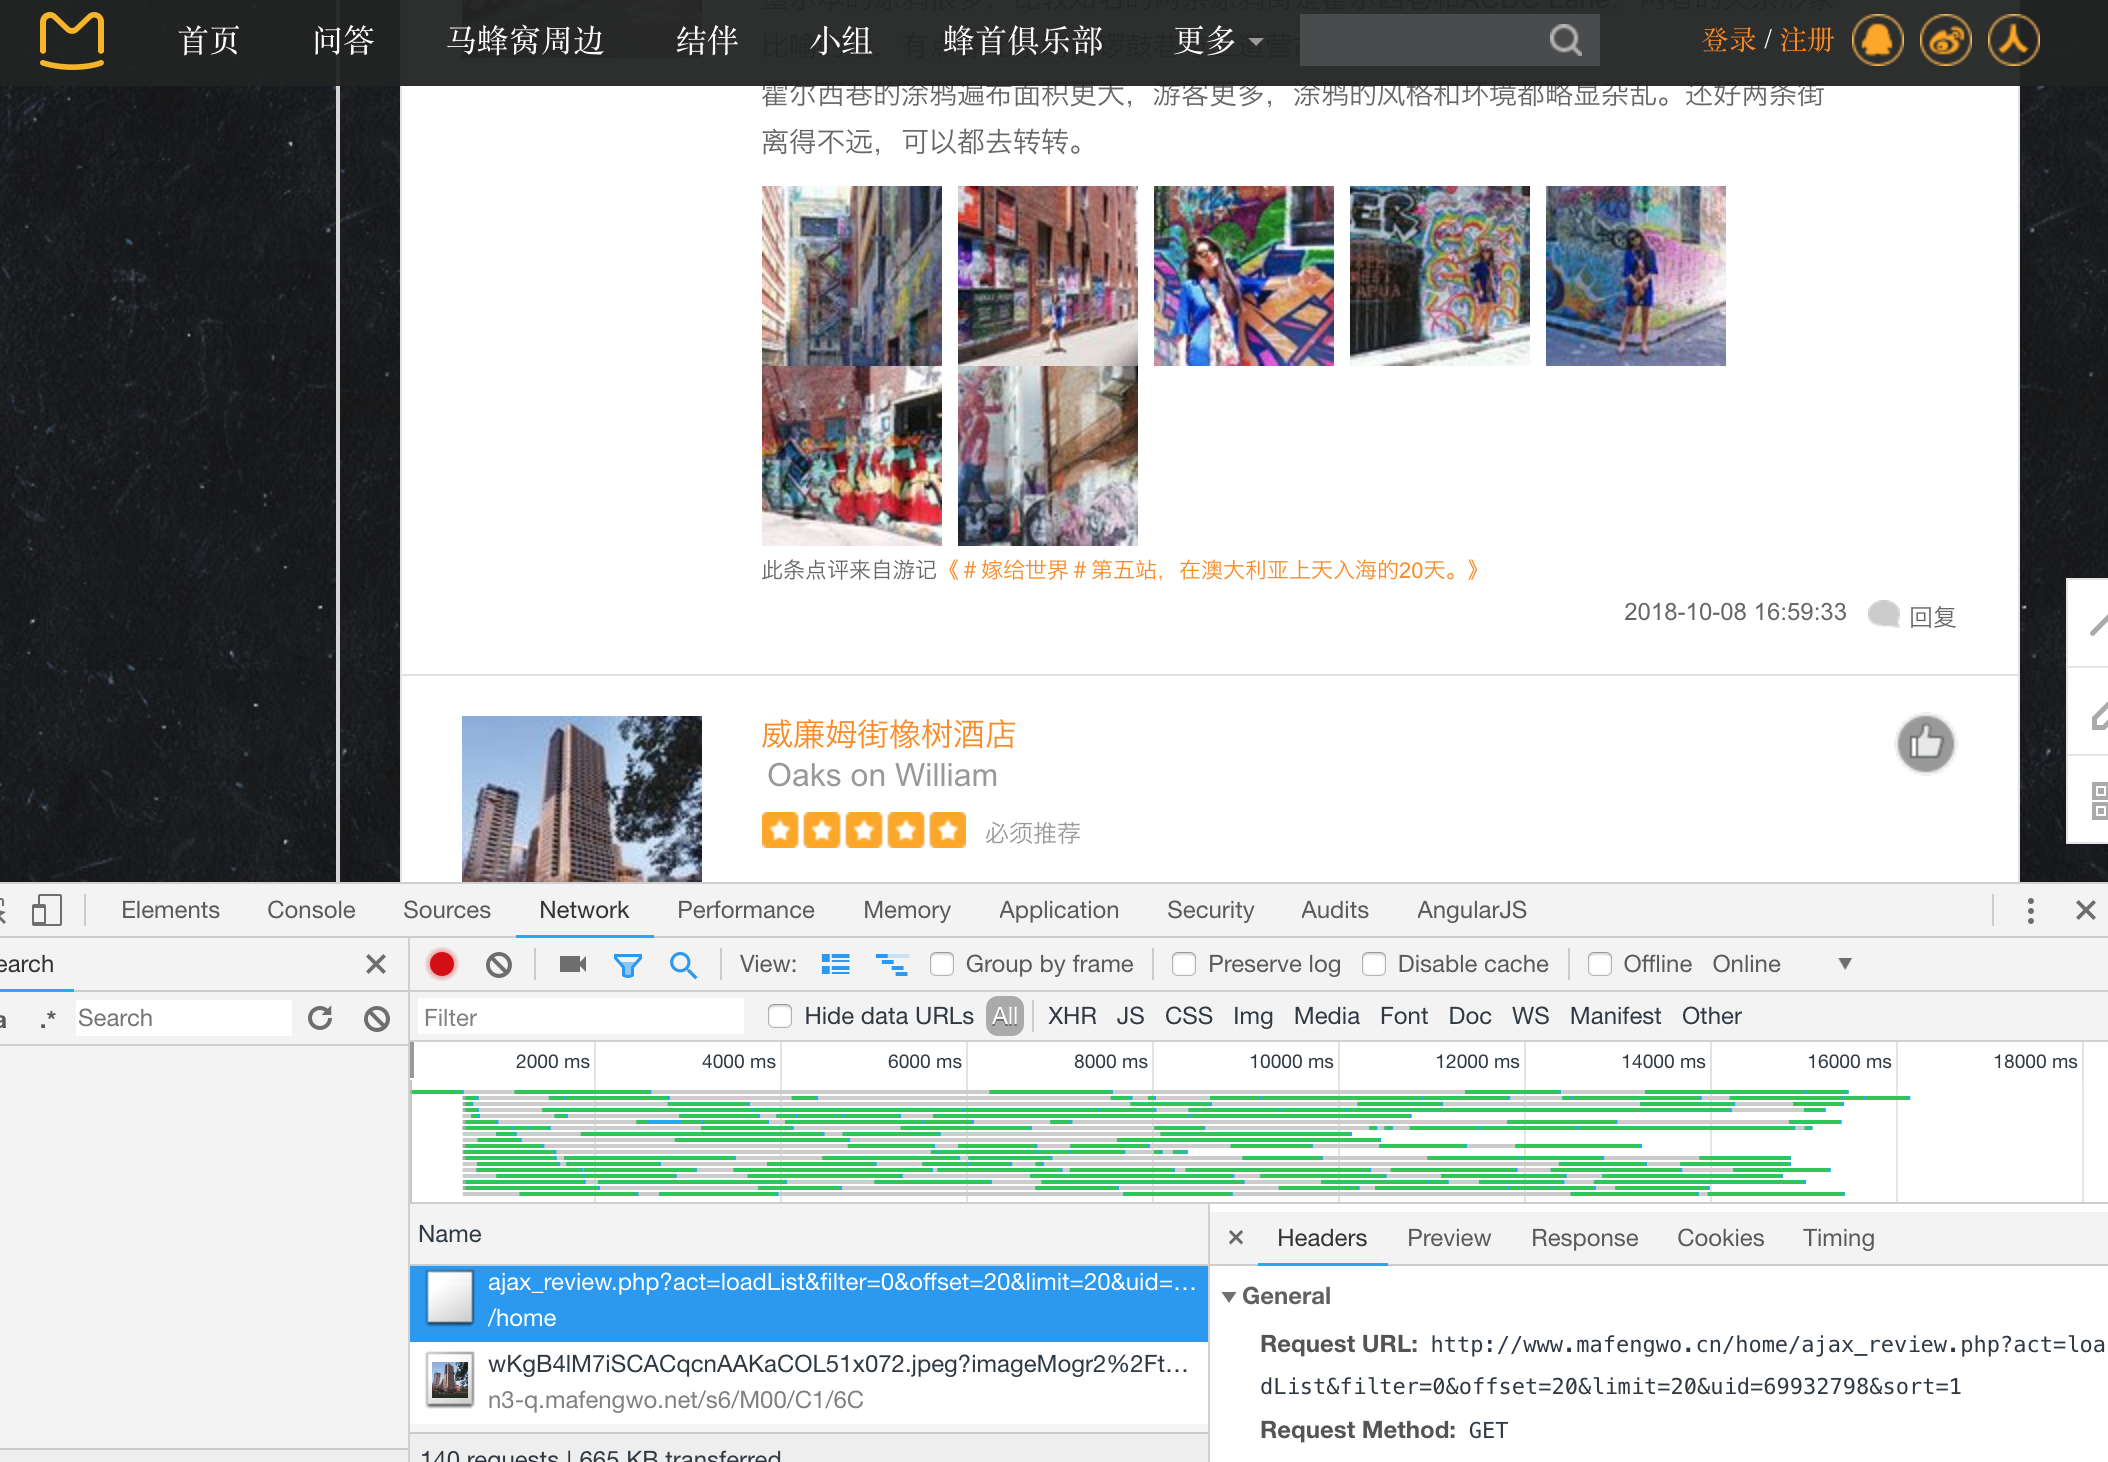

In [3]:
Image('mafengwo-xhr.png')

In [4]:
xhr_url = 'http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=20&limit=20&uid=69932798&sort=1'

The offset and limit parameters are especially useful here. We will tune them later.

In [5]:
import requests

In [6]:
requests.get(xhr_url)

<Response [403]>

There exists basic anti crawling mechanism. When we visit the page as normal user, this wall does not seem to exist. That is a hint that the anti-crawling here is not related with user login, so cookie is usually not needed. We just try to follow the headers incurred while regular browsing. User-Agent is the most common one.

In [8]:
requests.get(xhr_url, headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'
})

<Response [200]>

In [9]:
r = requests.get(xhr_url, headers = {
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'
})

In [10]:
from bs4 import BeautifulSoup

## Explore the JSON return structure

In [12]:
import json

In [14]:
data = json.loads(r.text)

In [15]:
data.keys()

dict_keys(['data'])

In [16]:
data['data'].keys()

dict_keys(['html', 'hasmore'])

In [18]:
type(data['data']['html'])

str

In [19]:
len(data['data']['html'])

108602

In [20]:
type(data['data']['hasmore'])

bool

In [21]:
data['data']['hasmore']

True

You've already guessed what is in this structure.

## parsing HTML

In [22]:
text = data['data']['html']

In [24]:
mypage = BeautifulSoup(text)

/Users/hupili/Desktop/project/python-for-data-and-media-communication/venv/lib/python3.6/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file /usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [37]:
mypage

<html><body><div class="poi-item have _j_poiitem _j_poiitem_6492065 _j_commentitem_154885672" data-itemid="154885672" data-lat="-37.8111702" data-lng="144.9563498" data-typeid="2">
<span class="cover">
<a href="/poi/6492065.html" target="_blank"><img src="http://n3-q.mafengwo.net/s6/M00/C1/6C/wKgB4lM7iSCACqcnAAKaCOL51x072.jpeg?imageMogr2%2Fthumbnail%2F%21120x120r%2Fgravity%2FCenter%2Fcrop%2F%21120x120%2Fquality%2F90" style="width: 120px;height: 120px;"/></a>
</span>
<div class="poi-detail">
<span class="s-ding">
<a class="icon-ding disabled"></a>
<span class="_j_dingnum hide">0</span>
</span>
<h3 class="title"><a href="/poi/6492065.html" target="_blank">威廉姆街橡树酒店<br/><span>Oaks on William</span></a></h3>
<div class="rating" data-originstar="5" data-star="5">
<div class="review-score">
<span class="star5"></span>
</div>
<div class="info">
<span class="tip" style="margin-left:0">必须推荐</span>
</div>
</div>
<div class="poi-rev _j_comment">
            酒店在墨尔本的商业区，步行可达各大商场和中国城，地理位置很方便。内部设施齐全，当

In [38]:
pois = mypage.find_all('div', attrs={'class': 'poi-item'})

In [39]:
len(pois)

20

In [40]:
poi = pois[0]

In [41]:
poi

<div class="poi-item have _j_poiitem _j_poiitem_6492065 _j_commentitem_154885672" data-itemid="154885672" data-lat="-37.8111702" data-lng="144.9563498" data-typeid="2">
<span class="cover">
<a href="/poi/6492065.html" target="_blank"><img src="http://n3-q.mafengwo.net/s6/M00/C1/6C/wKgB4lM7iSCACqcnAAKaCOL51x072.jpeg?imageMogr2%2Fthumbnail%2F%21120x120r%2Fgravity%2FCenter%2Fcrop%2F%21120x120%2Fquality%2F90" style="width: 120px;height: 120px;"/></a>
</span>
<div class="poi-detail">
<span class="s-ding">
<a class="icon-ding disabled"></a>
<span class="_j_dingnum hide">0</span>
</span>
<h3 class="title"><a href="/poi/6492065.html" target="_blank">威廉姆街橡树酒店<br/><span>Oaks on William</span></a></h3>
<div class="rating" data-originstar="5" data-star="5">
<div class="review-score">
<span class="star5"></span>
</div>
<div class="info">
<span class="tip" style="margin-left:0">必须推荐</span>
</div>
</div>
<div class="poi-rev _j_comment">
            酒店在墨尔本的商业区，步行可达各大商场和中国城，地理位置很方便。内部设施齐全，当时这里是墨尔本最新的酒店

In [42]:
poi.find('h3').text

'威廉姆街橡树酒店Oaks on William'

In [45]:
poi.find('div', attrs={'class': 'rating'}).attrs['data-star']

'5'

In [47]:
poi.find('div', attrs={'class': 'poi-rev _j_comment'}).text.strip()

'酒店在墨尔本的商业区，步行可达各大商场和中国城，地理位置很方便。内部设施齐全，当时这里是墨尔本最新的酒店，整体干干净净的，住着很舒服。\n酒店街对面是一个当地人会逛的小公园，高层视野也特别的棒\n酒店的早餐用餐处是一家独立的咖啡馆，食物和咖啡都很棒。'

In [48]:
poi.attrs['data-lat']

'-37.8111702'

In [49]:
poi.attrs['data-lng']

'144.9563498'

In [50]:
poi.find('a').attrs['href']

'/poi/6492065.html'

In [51]:
poi.find('span', attrs={'class': 'time'}).text.strip()

'2018-10-08 16:58:38'

In [55]:
items = []
for poi in pois:
    items.append(
        [
              poi.find('h3').text
            , poi.find('span', attrs={'class': 'time'}).text.strip()
            , poi.attrs['data-lat']
            , poi.attrs['data-lng']
            , poi.find('a').attrs['href']
            , poi.find('div', attrs={'class': 'rating'}).attrs['data-star']
            , poi.find('div', attrs={'class': 'poi-rev _j_comment'}).text.strip()   
        ]
    )

In [58]:
import pandas as pd
pd.DataFrame(items)

,0,1,2,3,4,5,6
0,威廉姆街橡树酒店Oaks on William,2018-10-08 16:58:38,-37.8111702,144.9563498,/poi/6492065.html,5,酒店在墨尔本的商业区，步行可达各大商场和中国城，地理位置很方便。内部设施齐全，当时这里是墨尔...
1,CBD Penthouse in the SkyCBD Penthouse in the Sky,2018-10-08 16:57:22,-37.814647130564,144.95355194159,/poi/21095947.html,5,"在一个公寓楼的最顶层，被形容为""CBD Penthouse in the Sky""一点都不为..."
2,The Coffee Club - Cavill MallThe Coffee Club,2018-10-08 16:54:57,-28.002016,153.429459,/poi/14091819.html,5,"""Where will I meet you?""\n""The Coffee Club.""\n..."
3,冲浪者天堂海滩集市Surfers Paradise Beachfront Markets,2018-10-08 16:53:15,-28.004095464625,153.43189126092,/poi/7668598.html,5,Beachfront Market是我在黄金海岸的日子里最喜欢的部分，市集里的摊位各有各的创...
4,黄金海岸芒特拉圈卡维尔酒店Mantra Circle on Cavill Gold Coast,2018-10-08 16:50:34,-28.001335784171,153.42697709799,/poi/87857.html,5,最值得称赞的是酒店的视野，透过全落地窗可以直接看到黄金海岸的海岸线，以及通往黄金海岸最繁华的...
5,兴格尔因锡蒂霍尔(市政厅店)Shingle Inn City Hall,2018-10-08 16:49:13,-27.468968,153.023516,/poi/59039112.html,5,布里斯班市政厅一层的这家很特别，整个店面的装修是复原了第一家店的样子，并且回收再利用了第一家...
6,龙柏考拉动物园Lone Pine Koala Sanctuary,2018-10-08 16:47:29,-27.5337818,152.968815,/poi/6300129.html,5,血和泪换来的重点：想要抱考拉拍照，一定要早早的去排队！\n我到了以后看到排队的人太多，就想着...
7,布里斯班市政厅Brisbane City Hall,2018-10-08 16:39:48,-27.468931,153.023543,/poi/5443034.html,5,市政厅是我觉得性价比特别高的一个景点，韵味十足的老市政厅建筑，可以乘坐最古老的电梯登顶，36...
8,昆士兰美术馆Queensland Art Gallery,2018-10-08 16:37:31,-27.472897167605,153.01807317791,/poi/6300132.html,5,喜欢逛美术馆和博物馆的人一定要去昆士兰现代艺术中心，布里斯班的大部分展馆都集中在这里，还有各...
9,LongtimeLongtime,2018-10-08 16:34:29,-27.459259,153.0339,/poi/58698176.html,5,食物很好吃很好吃很好吃，气氛特别棒特别棒特别棒，服务特别好特别好特别好，调酒师特别帅特别帅特...


## Handle pagingation

In [59]:
xhr_url_template = 'http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset={offset}&limit={limit}&uid={uid}&sort=1'

In [83]:
uid = 69932798
limit = 10
offset = 0

In [84]:
xhr_url = xhr_url_template.format(**locals())

In [85]:
xhr_url

'http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=0&limit=10&uid=69932798&sort=1'

In [86]:
items = []

while offset < 200:
    xhr_url = xhr_url_template.format(**locals())
    print('Crawling:', xhr_url)
    r = requests.get(xhr_url, headers = {
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_0) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.110 Safari/537.36'
    })    
    data = json.loads(r.text)
    text = data['data']['html']
    mypage = BeautifulSoup(text, 'lxml')
    pois = mypage.find_all('div', attrs={'class': 'poi-item'})
    print('pois obtained:', len(pois))
    for poi in pois:
        items.append(
            [
                  poi.find('h3').text
                , poi.find('span', attrs={'class': 'time'}).text.strip()
                , poi.attrs['data-lat']
                , poi.attrs['data-lng']
                , poi.find('a').attrs['href']
                , poi.find('div', attrs={'class': 'rating'}).attrs['data-star']
                , poi.find('div', attrs={'class': 'poi-rev _j_comment'}).text.strip()   
            ]
        )
    
    print('current items: ', len(items))
    offset += limit

Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=0&limit=10&uid=69932798&sort=1
pois obtained: 10
current items:  10
Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=10&limit=10&uid=69932798&sort=1
pois obtained: 10
current items:  20
Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=20&limit=10&uid=69932798&sort=1
pois obtained: 10
current items:  30
Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=30&limit=10&uid=69932798&sort=1
pois obtained: 10
current items:  40
Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=40&limit=10&uid=69932798&sort=1
pois obtained: 10
current items:  50
Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=50&limit=10&uid=69932798&sort=1
pois obtained: 10
current items:  60
Crawling: http://www.mafengwo.cn/home/ajax_review.php?act=loadList&filter=0&offset=60&lim

In [81]:
len(items)

107

In [88]:
df = pd.DataFrame(items, columns=['title', 'datetime', 'lat', 'long', 'url', 'rating', 'comment'])

In [89]:
df.head()

,title,datetime,lat,long,url,rating,comment
0,Berry Beans,2018-11-09 12:39:28,39.894514,116.392366,/poi/29591702.html,5,一杯好咖啡是一家咖啡馆的基本，在此基础上，再加上品味独特的环境，吸引力会倍增。可以上房揭瓦，...
1,大连恒隆广场Olympia 66,2018-10-17 11:15:19,38.90614,121.609461,/poi/18756904.html,5,恒隆广场很大，超级大，以前这里是大连奥林匹克足球场，近些年被改造成了商场，几乎包含了所有的商...
2,岩石区The Rocks,2018-10-16 09:30:43,-33.85985,151.20901,/poi/30285.html,4,整个岩石区，白天没觉得有多少人，安安静静地很舒服的感觉，但是！到了晚上！世界就变了！感觉整个...
3,Fortune of WarFortune of War,2018-10-16 09:30:06,-33.860335672698,151.20842591487,/poi/24791078.html,4,这家店于1828年诞生，距今已经190年！\n走进门我有呆住一下，我是走进了老年棋牌室么？大...
4,冲浪者天堂Surfers Paradise,2018-10-16 09:28:51,-28.000081,153.416641,/poi/17155.html,5,是全世界冲浪爱好者朝拜的地方，来这里怎么能不体验一下冲浪呢？\n长达42公里的冲浪者海滩，常...


In [90]:
df.to_csv('mafengwo-xhr.csv')

## Followup

- Can you change the testing logic to get a better termination criterion? You can use `len(pois)` as an indicator.